In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import numpy as np

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 55)

In [4]:
cd ../scripts/

/home/jds98/10 Academy/Week 1/Week-1-Project/scripts


In [5]:
import dataset_infos
import clean_transform as transf
import eda_functions as eda
import prerequisites as pre
import scores as sc

In [6]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


## Load the data and clean the data¶

In [7]:
df = pre.load_data()

In [8]:
df = pre.clean_data(df)

In [9]:
pre.data_infos(df)

 There are 149010 rows and 45 columns
The dataset contains 0.0 % missing values.


### Assignment of:
 - engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)
 - experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 


In [10]:
cd ../../data

/home/jds98/10 Academy/Week 1/Week-1-Project/data


In [11]:
dfEng = pd.read_csv('Engagement metrics with cluster.csv')

In [12]:
dfEng

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic,cluster
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","879,387,207.00",0
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","174,555,575.00",0
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","584,543,301.00",0
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","445,317,390.00",0
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","1,401,673,231.00",2
...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00","729,399,923.00",0
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00","490,198,637.00",0
106468,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00","242,579,156.00",0
106469,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00","582,791,270.00",0


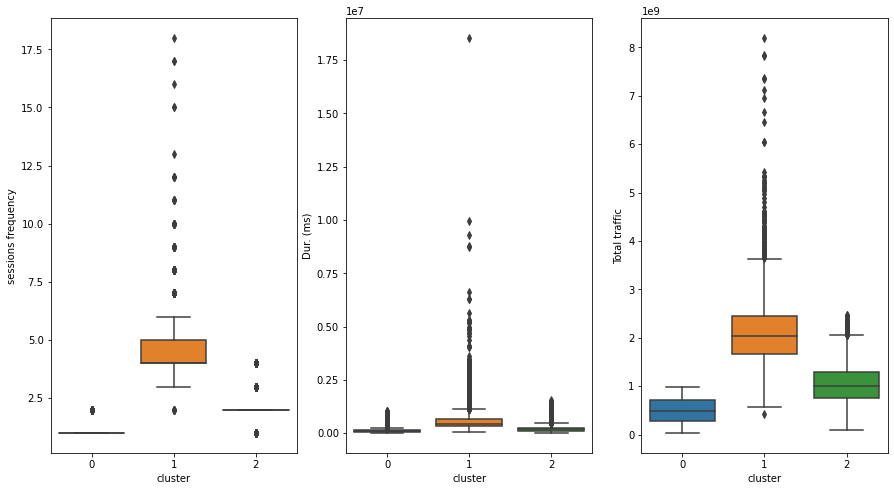

In [13]:
metrs = ['sessions frequency', 'Dur. (ms)', 'Total traffic']
plt.figure(figsize=(15, 8))
for i in range(len(metrs)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=metrs[i], data=dfEng)
plt.show()

#### Cluster 0 is the less engaged cluster

In [14]:
dfEng = sc.engagement_scores(dfEng, 0)
dfEng

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total traffic,cluster,eng_scores
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","879,387,207.00",0,"387,761,687.32"
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","174,555,575.00",0,"334,197,661.51"
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","584,543,301.00",0,"101,768,157.87"
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","445,317,390.00",0,"56,937,798.86"
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","1,401,673,231.00",2,"909,760,249.84"
...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00","729,399,923.00",0,"233,471,837.40"
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00","490,198,637.00",0,"11,759,973.40"
106468,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00","242,579,156.00",0,"260,116,358.05"
106469,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00","582,791,270.00",0,"86,095,980.24"


In [15]:
dfExp = pd.read_csv('Experience_metrics_clusters_data.csv')
dfExp

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP,cluster
0,"33,601,001,722.00",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00,46.00,76.00,0
1,"33,601,001,754.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,31.00,99.00,0
2,"33,601,002,511.00",106.10,17.66,undefined,48.00,49.00,123.77,97.00,1
3,"33,601,007,832.00",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00,84.00,248.00,0
4,"33,601,008,617.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,119.00,"40,497.00",0
...,...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",42.00,10.00,Huawei Honor 9 Lite,"9,978.00",387.00,52.00,"10,365.00",0
106467,"33,789,997,247.00",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00,40.00,116.00,0
106468,"3,197,020,876,596.00",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00,123.77,1.00,1
106469,"337,000,037,000,919.00",106.10,17.66,Huawei B525S-23A,11.00,22.00,123.77,33.00,0


In [16]:
dfExp_clust = transf.aggregate(dfExp, 'cluster', ['Avg RTT', 'Avg Bearer TP'], ['mean', 'mean'])
clust_Hand = list((dfExp[dfExp['cluster'] == 0])['Handset Type'].mode())
clust_Hand.append(list((dfExp[dfExp['cluster'] == 1])['Handset Type'].mode())[0])
clust_Hand.append(list((dfExp[dfExp['cluster'] == 2])['Handset Type'].mode())[0])
dfExp_clust['Handset Type'] = clust_Hand
dfExp_clust

,cluster,Avg RTT,Avg Bearer TP,Handset Type
0,0,67.92,"6,911.29",Huawei B528S-23A
1,1,105.78,"5,534.61",undefined
2,2,282.96,"59,993.71",Huawei B528S-23A


### Worst experience cluster identification
The worst expericence cluster is between cluster 0 and 1. With RTT and RT the decision is difficult to take because cluster 0 as higher TP average while cluster 2 as higher RTT average. But cluster 1 is using the most used handset while cluster 1 using an undefined handset. Hence, we're going to consider the cluster 1 as the worst experience cluster.

In [17]:
dfExp = sc.experience_scores(dfExp, 1)
dfExp

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP,cluster,exp_scores
0,"33,601,001,722.00",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00,46.00,76.00,0,"5,041.21"
1,"33,601,001,754.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,31.00,99.00,0,"5,029.39"
2,"33,601,002,511.00",106.10,17.66,undefined,48.00,49.00,123.77,97.00,1,"5,029.20"
3,"33,601,007,832.00",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00,84.00,248.00,0,"4,874.24"
4,"33,601,008,617.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,119.00,"40,497.00",0,"35,337.93"
...,...,...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",42.00,10.00,Huawei Honor 9 Lite,"9,978.00",387.00,52.00,"10,365.00",0,"4,919.99"
106467,"33,789,997,247.00",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00,40.00,116.00,0,"5,009.66"
106468,"3,197,020,876,596.00",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00,123.77,1.00,1,"5,080.38"
106469,"337,000,037,000,919.00",106.10,17.66,Huawei B525S-23A,11.00,22.00,123.77,33.00,0,"5,068.41"


### Considering the average of both engagement & experience scores as  the satisfaction score

In [18]:
satisf = pd.DataFrame(columns=['MSISDN/Number','eng_scores', 'exp_scores'])
satisf['MSISDN/Number'] = dfEng['MSISDN/Number']
satisf['eng_scores'] = dfEng['eng_scores']
satisf['exp_scores'] = dfExp['exp_scores']
satisf['scores'] = (satisf['eng_scores'] + satisf['exp_scores'])/2
satisf

,MSISDN/Number,eng_scores,exp_scores,scores
0,"33,601,001,722.00","387,761,687.32","5,041.21","193,883,364.27"
1,"33,601,001,754.00","334,197,661.51","5,029.39","167,101,345.45"
2,"33,601,002,511.00","101,768,157.87","5,029.20","50,886,593.54"
3,"33,601,007,832.00","56,937,798.86","4,874.24","28,471,336.55"
4,"33,601,008,617.00","909,760,249.84","35,337.93","454,897,793.89"
...,...,...,...,...
106466,"33,789,996,170.00","233,471,837.40","4,919.99","116,738,378.70"
106467,"33,789,997,247.00","11,759,973.40","5,009.66","5,882,491.53"
106468,"3,197,020,876,596.00","260,116,358.05","5,080.38","130,060,719.22"
106469,"337,000,037,000,919.00","86,095,980.24","5,068.41","43,050,524.32"


In [19]:
dfApp = pd.read_csv('Engagement metrics with cluster for applications.csv')

## Top 10 satisfied customer

In [20]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


<Figure size 432x288 with 0 Axes>

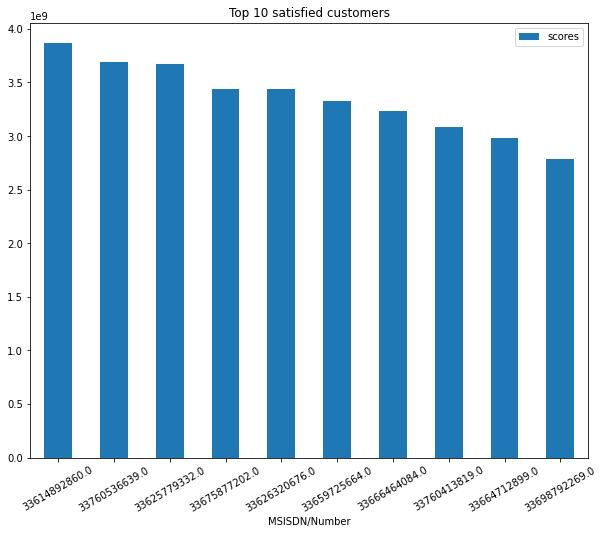

In [21]:
top_satisfied = satisf[['MSISDN/Number', 'scores']].sort_values(by=['scores'], ascending=False)[:10]
top_satisfied = top_satisfied.set_index('MSISDN/Number')

plt.figure()
top_satisfied.plot(kind='bar', figsize=(10,8), rot=30)
plt.title('Top 10 satisfied customers')
plt.savefig('Top 10 satisfied customers.png')

### A regression model to predict the satisfaction score of a customer

#### The data model

In [22]:
dfEng.rename(columns = {'cluster':'cluster_Eng'}, inplace = True)
dfExp.rename(columns = {'cluster':'cluster_Exp'}, inplace = True)

In [23]:
dfApp.rename(columns = {'cluster':'cluster_App'}, inplace = True)

In [24]:
model_df = pd.merge(dfEng, dfExp,on='MSISDN/Number', how='outer')
model_df = model_df.drop(['Total traffic', 'Avg RTT', 'Avg Bearer TP'], axis=1)

In [25]:
model_df = pd.merge(model_df, dfApp, on='MSISDN/Number', how='outer')

In [26]:
model_df.drop(['MSISDN/Number', 'cluster_Eng', 'cluster_Exp', 'cluster_App'], axis=1, inplace=True)

In [27]:
model_df['scores'] = list(satisf['scores'])

In [28]:
model_df

,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),eng_scores,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),exp_scores,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),scores
0,1,"116,720.00","842,637,466.00","36,053,108.00","387,761,687.32",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00,"5,041.21","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00","193,883,364.27"
1,1,"181,230.00","120,755,184.00","36,104,459.00","334,197,661.51",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,"5,029.39","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00","167,101,345.45"
2,1,"134,969.00","556,659,663.00","39,306,820.00","101,768,157.87",106.10,17.66,undefined,48.00,49.00,"5,029.20","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00","50,886,593.54"
3,1,"49,878.00","401,993,172.00","20,327,526.00","56,937,798.86",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00,"4,874.24","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00","28,471,336.55"
4,2,"37,104.00","1,363,130,417.00","94,280,527.00","909,760,249.84",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,"35,337.93","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00","454,897,793.89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106466,1,"8,810.00","687,925,212.00","26,716,429.00","233,471,837.40",42.00,10.00,Huawei Honor 9 Lite,"9,978.00",387.00,"4,919.99","300,183.00","7,531,269.00","1,006,915.00","26,647,843.00","14,902,538.00","660,361,359.00","295,282,817.00","116,738,378.70"
106467,1,"140,988.00","444,575,092.00","35,732,243.00","11,759,973.40",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00,"5,009.66","498,569.00","5,429,705.00","2,514,097.00","19,851,572.00","8,531,060.00","437,003,292.00","211,115,113.00","5,882,491.53"
106468,1,"877,385.00","194,828,056.00","37,295,915.00","260,116,358.05",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00,"5,080.38","715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00","130,060,719.22"
106469,1,"253,030.00","539,634,985.00","56,652,839.00","86,095,980.24",106.10,17.66,Huawei B525S-23A,11.00,22.00,"5,068.41","521,566.00","9,830,617.00","3,318,582.00","36,734,940.00","30,905,042.00","510,142,695.00","149,188,439.00","43,050,524.32"


In [29]:
model_df_processed = model_df.copy()
model_df.columns

Index(['sessions frequency', 'Dur. (ms)', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'eng_scores', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'exp_scores', 'Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)', 'scores'],
      dtype='object')

In [30]:
model_df_processed.drop(['Handset Type'], axis = 1, inplace = True)

In [31]:
model_df_processed = transf.scaler(model_df_processed)

#### Process Handset

In [32]:
handsets = pd.get_dummies(model_df['Handset Type'], drop_first = True)
handsets.head()

,A-Link Telecom I. Cubot Note Plus,A-Link Telecom I. Cubot Note S,A-Link Telecom I. Cubot Nova,A-Link Telecom I. Cubot Power,A-Link Telecom I. Cubot R9,A-Link Telecom I. Cubot X18 Plus,Acer Liquid M220,Acer Liquid Z220,Acer Liquid Z530,Acer Liquid Z630,Acer Liquid Zest 4G,Acer Liquid Zest Plus,Acer M310,Acer V370 Acer V370 Liquid E2 Duo,Acer Zx Z130,Adar Stanley Mobile S231,Alif Communicati. Pulian Cm84,Apple iPad (A1823),Apple iPad (A1954),Apple iPad 2 (A1396),Apple iPad 3 (A1430),Apple iPad 4 (A1460),Apple iPad Air (A1475),Apple iPad Air 2 (A1567),Apple iPad Mini (A1455),Apple iPad Mini (A1490),Apple iPad Mini (A1600),...,Yota Devices Yota Y3,Yota Devices Yotaphone2,Zebra Technologi. Mc5574,Zebra Technologi. Mc659B,Zebra Technologi. Mc67Na,Zebra Technologi. Symbol Tc55Bh,Zte A2016,Zte Axon 6S Zte Axon 7 Axon 7,Zte Axon M Zte Axon M Axon M Axon M,Zte Blade A2 Plus Zte Blade A610 Plus,Zte Blade A452 Blade A452,Zte Blade A506 Blade A506,Zte Blade A506 Blade A506 Dive 71 Orange Dive 71 D52 Lite,Zte Blade L110 Zte Blade L110 Blade L110 Blade L110,Zte Blade V7 Lite Blade V6 Plus Zte Blitz,Zte Blade V8 Blade V8,Zte Blade V8 Lite Blade V8 Lite Zte Blade V8 Se,Zte Mf190,Zte Mf259,Zte Mf626,Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Zte Starxtrem By Sfr,Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Zyxel Communicat. Lte7460,Zyxel Communicat. Sbg3600,Zyxel Communicat. Zyxel Wah7706,undefined
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
model_df_processed = pd.concat([model_df_processed, handsets], axis = 1)
model_df_processed.head()

,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),eng_scores,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),exp_scores,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),scores,A-Link Telecom I. Cubot Note Plus,A-Link Telecom I. Cubot Note S,A-Link Telecom I. Cubot Nova,A-Link Telecom I. Cubot Power,A-Link Telecom I. Cubot R9,A-Link Telecom I. Cubot X18 Plus,Acer Liquid M220,Acer Liquid Z220,Acer Liquid Z530,...,Yota Devices Yota Y3,Yota Devices Yotaphone2,Zebra Technologi. Mc5574,Zebra Technologi. Mc659B,Zebra Technologi. Mc67Na,Zebra Technologi. Symbol Tc55Bh,Zte A2016,Zte Axon 6S Zte Axon 7 Axon 7,Zte Axon M Zte Axon M Axon M Axon M,Zte Blade A2 Plus Zte Blade A610 Plus,Zte Blade A452 Blade A452,Zte Blade A506 Blade A506,Zte Blade A506 Blade A506 Dive 71 Orange Dive 71 D52 Lite,Zte Blade L110 Zte Blade L110 Blade L110 Blade L110,Zte Blade V7 Lite Blade V6 Plus Zte Blitz,Zte Blade V8 Blade V8,Zte Blade V8 Lite Blade V8 Lite Zte Blade V8 Se,Zte Mf190,Zte Mf259,Zte Mf626,Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Zte Starxtrem By Sfr,Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Zyxel Communicat. Lte7460,Zyxel Communicat. Sbg3600,Zyxel Communicat. Zyxel Wah7706,undefined
0,0.00,0.01,0.10,0.05,0.05,0.03,0.00,0.00,0.00,0.02,0.05,0.03,0.03,0.05,0.07,0.10,0.05,0.05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.00,0.01,0.01,0.05,0.04,0.02,0.00,0.00,0.00,0.02,0.06,0.03,0.08,0.03,0.03,0.02,0.03,0.04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.00,0.01,0.07,0.05,0.01,0.08,0.08,0.00,0.00,0.02,0.07,0.02,0.08,0.05,0.05,0.07,0.06,0.01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.00,0.00,0.05,0.02,0.01,0.05,0.07,0.00,0.00,0.02,0.01,0.06,0.05,0.02,0.00,0.05,0.00,0.01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.06,0.00,0.17,0.13,0.12,0.08,0.02,0.15,0.00,0.14,0.07,0.12,0.08,0.09,0.12,0.17,0.10,0.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
model_df_processed = model_df_processed[['sessions frequency', 'Dur. (ms)', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'eng_scores', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'exp_scores', 'Social Media Total (Bytes)', 'Google Total (Bytes)',
       'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)',
       'Gaming Total (Bytes)', 'Other Total (Bytes)', 'scores',
 'Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)']]

In [35]:
model_df_processed

,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),eng_scores,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),exp_scores,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),scores,Huawei B528S-23A,Apple iPhone 6S (A1688),Apple iPhone 6 (A1586),undefined,Apple iPhone 7 (A1778),Apple iPhone Se (A1723),Apple iPhone 8 (A1905),Apple iPhone Xr (A2105),Samsung Galaxy S8 (Sm-G950F),Apple iPhone X (A1901)
0,0.00,0.01,0.10,0.05,0.05,0.03,0.00,0.00,0.00,0.02,0.05,0.03,0.03,0.05,0.07,0.10,0.05,0.05,0,0,0,0,0,0,0,0,0,0
1,0.00,0.01,0.01,0.05,0.04,0.02,0.00,0.00,0.00,0.02,0.06,0.03,0.08,0.03,0.03,0.02,0.03,0.04,0,0,0,0,1,0,0,0,0,0
2,0.00,0.01,0.07,0.05,0.01,0.08,0.08,0.00,0.00,0.02,0.07,0.02,0.08,0.05,0.05,0.07,0.06,0.01,0,0,0,1,0,0,0,0,0,0
3,0.00,0.00,0.05,0.02,0.01,0.05,0.07,0.00,0.00,0.02,0.01,0.06,0.05,0.02,0.00,0.05,0.00,0.01,0,0,0,0,0,0,0,0,0,0
4,0.06,0.00,0.17,0.13,0.12,0.08,0.02,0.15,0.00,0.14,0.07,0.12,0.08,0.09,0.12,0.17,0.10,0.12,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106466,0.00,0.00,0.08,0.03,0.03,0.03,0.05,0.04,0.02,0.02,0.01,0.05,0.02,0.06,0.04,0.09,0.04,0.03,0,0,0,0,0,0,0,0,0,0
106467,0.00,0.01,0.05,0.05,0.00,0.02,0.03,0.00,0.00,0.02,0.01,0.04,0.06,0.04,0.02,0.06,0.03,0.00,0,0,0,0,0,0,0,0,0,0
106468,0.00,0.05,0.02,0.05,0.03,0.08,0.08,0.00,0.00,0.02,0.02,0.07,0.04,0.03,0.07,0.02,0.06,0.03,0,0,0,0,0,0,0,0,0,0
106469,0.00,0.01,0.07,0.07,0.01,0.08,0.08,0.00,0.00,0.02,0.01,0.06,0.08,0.08,0.08,0.07,0.02,0.01,0,0,0,0,0,0,0,0,0,0


In [36]:
X = model_df_processed.drop(['scores', 'eng_scores', 'exp_scores'], axis=1)
y = model_df_processed['scores']

### Modelling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Cross validation with KFold CV

In [39]:
# k-fold CV (using all the variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.77642725, 0.7756095 , 0.77391192, 0.78311363, 0.74987026])

In [40]:
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
print('train score:', lm.score(X_train, y_train))
print('test score:', lm.score(X_test, y_test))

train score: 0.7726396666858539
test score: 0.7574124577984871


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# fit multiple polynomial features
degrees = [1, 2]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

In [44]:
import sklearn

print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.77, test score=0.76
Polynomial degree 2: train score=0.89, test score=0.88


### The performance of our model has been improved with polynomial feature of order 2

In [45]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [46]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
scores

array([0.88970637, 0.89010621, 0.8761465 , 0.88996959, 0.8738051 ])

In [47]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [48]:
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.8902735862399578
test score: 0.8832849488274606


In [49]:
predictions = model.predict(X_test)

In [50]:
predictions[:10]

array([0.10932277, 0.06010266, 0.10488157, 0.03881876, 0.02685218,
       0.01862624, 0.02242136, 0.02822049, 0.02095324, 0.02137578])

[ 6814 13628 20442 27256 34070 40884 47698 54512 61326 68140]


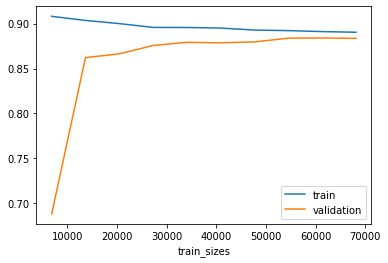

In [51]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.savefig('learning curve.png')

In [52]:
pwd

'/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures'

In [53]:
cd ../../data/

/home/jds98/10 Academy/Week 1/Week-1-Project/data


In [54]:
top_satisfied_cust_df = satisf[['MSISDN/Number', 'scores']].sort_values(by=['scores'], ascending=False)
top_satisfied_cust_df.to_csv('Top satisfied customers.csv', index=False)
model_df_processed.to_csv('Processed data used for the model.csv', index=False)

In [55]:
pwd

'/home/jds98/10 Academy/Week 1/Week-1-Project/data'

In [56]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


### k-means (k=2) on the engagement & the experience score . 

In [57]:
satisf

,MSISDN/Number,eng_scores,exp_scores,scores
0,"33,601,001,722.00","387,761,687.32","5,041.21","193,883,364.27"
1,"33,601,001,754.00","334,197,661.51","5,029.39","167,101,345.45"
2,"33,601,002,511.00","101,768,157.87","5,029.20","50,886,593.54"
3,"33,601,007,832.00","56,937,798.86","4,874.24","28,471,336.55"
4,"33,601,008,617.00","909,760,249.84","35,337.93","454,897,793.89"
...,...,...,...,...
106466,"33,789,996,170.00","233,471,837.40","4,919.99","116,738,378.70"
106467,"33,789,997,247.00","11,759,973.40","5,009.66","5,882,491.53"
106468,"3,197,020,876,596.00","260,116,358.05","5,080.38","130,060,719.22"
106469,"337,000,037,000,919.00","86,095,980.24","5,068.41","43,050,524.32"


In [58]:
satisf_norm = transf.normalize(satisf.drop(['MSISDN/Number'], axis=1))
satisf_norm

,eng_scores,exp_scores,scores
0,0.13,-0.35,0.13
1,-0.01,-0.35,-0.01
2,-0.65,-0.35,-0.65
3,-0.77,-0.36,-0.77
4,1.55,1.61,1.55
...,...,...,...
106466,-0.29,-0.36,-0.29
106467,-0.89,-0.35,-0.89
106468,-0.22,-0.35,-0.22
106469,-0.69,-0.35,-0.69


In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(satisf_norm.drop(['scores'], axis=1))

KMeans(max_iter=50, n_clusters=2)

In [60]:
satisf_norm.loc[:,'MSISDN/Number'] = satisf['MSISDN/Number']
satisf_norm

,eng_scores,exp_scores,scores,MSISDN/Number
0,0.13,-0.35,0.13,"33,601,001,722.00"
1,-0.01,-0.35,-0.01,"33,601,001,754.00"
2,-0.65,-0.35,-0.65,"33,601,002,511.00"
3,-0.77,-0.36,-0.77,"33,601,007,832.00"
4,1.55,1.61,1.55,"33,601,008,617.00"
...,...,...,...,...
106466,-0.29,-0.36,-0.29,"33,789,996,170.00"
106467,-0.89,-0.35,-0.89,"33,789,997,247.00"
106468,-0.22,-0.35,-0.22,"3,197,020,876,596.00"
106469,-0.69,-0.35,-0.69,"337,000,037,000,919.00"


In [61]:
#Appending the resultant clustering labels in the last column, the view of the data frame.
satisf_norm['cluster'] = kmeans.labels_
satisf_norm

,eng_scores,exp_scores,scores,MSISDN/Number,cluster
0,0.13,-0.35,0.13,"33,601,001,722.00",0
1,-0.01,-0.35,-0.01,"33,601,001,754.00",0
2,-0.65,-0.35,-0.65,"33,601,002,511.00",0
3,-0.77,-0.36,-0.77,"33,601,007,832.00",0
4,1.55,1.61,1.55,"33,601,008,617.00",1
...,...,...,...,...,...
106466,-0.29,-0.36,-0.29,"33,789,996,170.00",0
106467,-0.89,-0.35,-0.89,"33,789,997,247.00",0
106468,-0.22,-0.35,-0.22,"3,197,020,876,596.00",0
106469,-0.69,-0.35,-0.69,"337,000,037,000,919.00",0


In [62]:
satisf['cluster'] = satisf_norm['cluster']
satisf

,MSISDN/Number,eng_scores,exp_scores,scores,cluster
0,"33,601,001,722.00","387,761,687.32","5,041.21","193,883,364.27",0
1,"33,601,001,754.00","334,197,661.51","5,029.39","167,101,345.45",0
2,"33,601,002,511.00","101,768,157.87","5,029.20","50,886,593.54",0
3,"33,601,007,832.00","56,937,798.86","4,874.24","28,471,336.55",0
4,"33,601,008,617.00","909,760,249.84","35,337.93","454,897,793.89",1
...,...,...,...,...,...
106466,"33,789,996,170.00","233,471,837.40","4,919.99","116,738,378.70",0
106467,"33,789,997,247.00","11,759,973.40","5,009.66","5,882,491.53",0
106468,"3,197,020,876,596.00","260,116,358.05","5,080.38","130,060,719.22",0
106469,"337,000,037,000,919.00","86,095,980.24","5,068.41","43,050,524.32",0


In [63]:
satisf.rename(columns={'scores': 'avg satisfaction'}, inplace=True)

### Aggregation of the average satisfaction & experience score per cluster

In [64]:
ag = 'cluster'
usec = ['avg satisfaction', 'exp_scores']
methodsc = [['min', 'max', 'mean'], ['min', 'max', 'mean']]
satisf_clusters = transf.aggregate(satisf, ag, usec, methodsc)

In [65]:
satisf_clusters['avg satisfaction']

,min,max,mean
0,"109,743.59","701,565,497.73","139,358,051.13"
1,"13,098,323.49","3,864,563,039.04","667,231,682.25"


In [66]:
satisf_clusters['exp_scores']

,min,max,mean
0,27.54,"59,926.98","8,110.76"
1,309.58,"256,021.44","49,071.29"


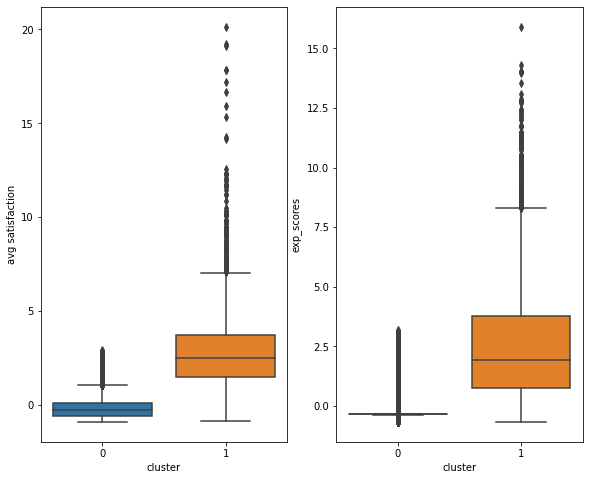

In [67]:
satisf_norm.rename(columns={'scores': 'avg satisfaction'}, inplace=True)
smetrs = ['avg satisfaction', 'exp_scores']
plt.figure(figsize=(15, 8))
for i in range(len(smetrs)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=smetrs[i], data=satisf_norm)
plt.savefig('satisfaction_clusters.png')

In [97]:
cd ../../data

/home/jds98/10 Academy/Week 1/Week-1-Project/data


In [98]:
satisf.to_csv('Satisfaction cluster_data.csv', index=False)

In [99]:
Final_table = model_df.drop(['eng_scores', 'exp_scores', 'scores'], axis=1)

In [100]:
Final_table['Engagement_scores'] = model_df['eng_scores']
Final_table['Experience_scores'] = model_df['exp_scores']
Final_table['Satisfaction_scores'] = model_df['scores']

In [101]:
Final_table.insert(0, "MSISDN/Number", dfEng['MSISDN/Number'], allow_duplicates=False)

In [73]:
# Final_table.rename(columns= {'sessions frequency': 'sessions_frequency',
#     'Dur. (ms)': 'Dur_ms',
#     'Total DL (Bytes)': 'Total_DL_Bytes',
#     'Total UL (Bytes)': 'Total_UL_Bytes',
#     'Avg RTT DL (ms)': 'Avg_RTT_DL_ms',
#     'Avg RTT UL (ms)': 'Avg_RTT_UL_ms',
#     'Handset Type': 'Handset_Type',
#     'Avg Bearer TP DL (kbps)': 'Avg_Bearer_TP_DL_kbps',
#     'Avg Bearer TP UL (kbps)': 'Avg_Bearer_TP_UL_kbps',
#     'Social Media Total (Bytes)': 'Social_Media_Total_Bytes',
#     'Google Total (Bytes)': 'Google_Total_Bytes',
#     'Email Total (Bytes)': 'Email_Total_Bytes',
#     'Youtube Total (Bytes)': 'Youtube_Total_Bytes',
#     'Netflix Total (Bytes)': 'Netflix_Total_Bytes',
#     'Gaming Total (Bytes)': 'Gaming_Total_Bytes',
#     'Other Total (Bytes)': 'Other_Total_Bytes'}, inplace=True)

In [74]:
Final_table.dtypes

MSISDN/Number                 float64
sessions frequency              int64
Dur. (ms)                     float64
Total DL (Bytes)              float64
Total UL (Bytes)              float64
Avg RTT DL (ms)               float64
Avg RTT UL (ms)               float64
Handset Type                   object
Avg Bearer TP DL (kbps)       float64
Avg Bearer TP UL (kbps)       float64
Social Media Total (Bytes)    float64
Google Total (Bytes)          float64
Email Total (Bytes)           float64
Youtube Total (Bytes)         float64
Netflix Total (Bytes)         float64
Gaming Total (Bytes)          float64
Other Total (Bytes)           float64
Engagement_scores             float64
Experience_scores             float64
Satisfaction_scores           float64
dtype: object

In [104]:
Final_table.to_csv('Final table.csv', index=False)

In [105]:
(pd.read_csv('Final table.csv'))

,MSISDN/Number,sessions frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Engagement_scores,Experience_scores,Satisfaction_scores,satisfied
0,"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00,"2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00","387,761,687.32","5,041.21","193,883,364.27",Unsatisfied
1,"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,"2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00","334,197,661.51","5,029.39","167,101,345.45",Unsatisfied
2,"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00",106.10,17.66,undefined,48.00,49.00,"3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00","101,768,157.87","5,029.20","50,886,593.54",Unsatisfied
3,"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00,"280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00","56,937,798.86","4,874.24","28,471,336.55",Unsatisfied
4,"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,"2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00","909,760,249.84","35,337.93","454,897,793.89",Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00",42.00,10.00,Huawei Honor 9 Lite,"9,978.00",387.00,"300,183.00","7,531,269.00","1,006,915.00","26,647,843.00","14,902,538.00","660,361,359.00","295,282,817.00","233,471,837.40","4,919.99","116,738,378.70",Unsatisfied
106467,"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00,"498,569.00","5,429,705.00","2,514,097.00","19,851,572.00","8,531,060.00","437,003,292.00","211,115,113.00","11,759,973.40","5,009.66","5,882,491.53",Unsatisfied
106468,"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00,"715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00","260,116,358.05","5,080.38","130,060,719.22",Unsatisfied
106469,"337,000,037,000,919.00",1,"253,030.00","539,634,985.00","56,652,839.00",106.10,17.66,Huawei B525S-23A,11.00,22.00,"521,566.00","9,830,617.00","3,318,582.00","36,734,940.00","30,905,042.00","510,142,695.00","149,188,439.00","86,095,980.24","5,068.41","43,050,524.32",Unsatisfied


### Satisfaction frequencies

In [102]:
satisfied = []
for s in list(satisf['cluster']):
    if s == 0:
        satisfied.append('Unsatisfied')
    else:
        satisfied.append('Satisfied')

In [103]:
Final_table['satisfied'] = satisfied
sat = Final_table['satisfied'].value_counts()

In [90]:
pwd

'/home/jds98/10 Academy/Week 1/Week-1-Project/data'

In [91]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


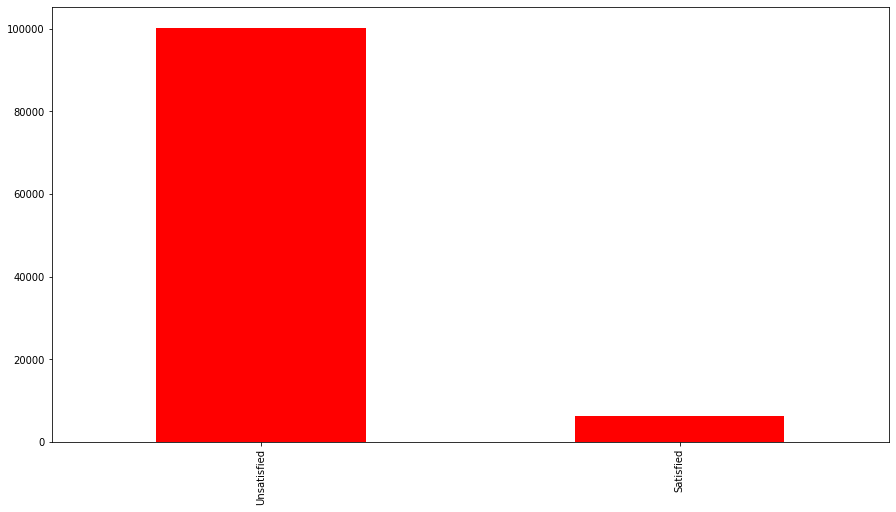

In [96]:
fig, ax = plt.subplots(figsize=(15, 8))
sat.plot(ax=ax, kind='bar', color='red')
plt.savefig('satisfaction classes.png')